In [2]:
import os
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import trompy as tp

%run "..//src//vgp_helper_fx"

In [3]:
DATA_FOLDER = "C:\\Users\\mko102\\UiT Office 365\\O365-Pipette 2 - Dokumenter\\People\\Mette\\GitHub\\2P\\VGP2\\Processed"

#casein session
animal="VGP505"
day="037"
day_meta='037'
date="20230418"


s2p_folder = os.path.join(DATA_FOLDER,
                          "s2p",
                          "sub-{}\\ses-{}"
                          .format(animal, day))

# to get event file in single folder
rows,header=tp.metafilereader('C:\\Users\\mko102\\UiT Office 365\\O365-Pipette 2 - Dokumenter\\People\\Mette\\GitHub\\2P\\Metafile_VGP2.3.xls',sheetname='reduced_metafile')
folder= 'C:\\Users\\mko102\\UiT Office 365\\O365-Pipette 2 - Dokumenter\\People\\Mette\\GitHub\\2P\\VGP2\\Bonsai\\'


for row in rows: 
    if row[0]== animal and row[2] == day_meta: 
        events_file=folder+row[5]

        


data = assemble_data(s2p_folder,events_file,animal="VGP505", diet="PR", solution="Casein")

File is excel file. Making csv metafile first


In [4]:
s2p_length=len(data['raw_F'][0,:])
pump_frames,lick_frames=get_frames(events_file,s2p_length)

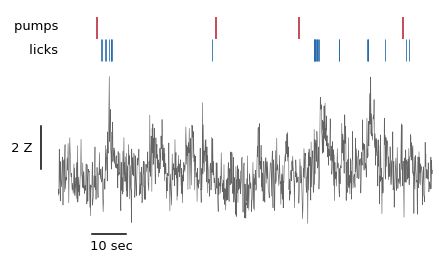

In [16]:
def z_score(signal):
    mean=np.mean(signal)
    sd=np.std(signal)
    z=(signal-mean)/sd
    
    return z

start_frame=2200
n_frames=1100
frames_to_plot=range(start_frame,start_frame+n_frames)
cell_to_plot=61
licks_to_plot=[lick-start_frame for lick in lick_frames]
pumps_to_plot=[pump-start_frame for pump in pump_frames]
signal_to_plot = z_score(data['raw_F'][cell_to_plot,frames_to_plot])


f,ax=plt.subplots(figsize=(8,4), ncols=1, nrows=1, sharey='row')
f.subplots_adjust(wspace=0.15,hspace=0.5, bottom=0.05, left=0.25)


ax.plot(signal_to_plot, lw=0.6, color='#636363')
ax.vlines(licks_to_plot,5,6,lw=0.8, color='#2166ac')
ax.vlines(pumps_to_plot,6,7, color='#b2182b')
ax.set_xlim(0,n_frames)

#time scale bar
scale_bar_y=-3
scale_bar_x=100
ax.plot([scale_bar_x,scale_bar_x+100],[scale_bar_y,scale_bar_y],color='k')
ax.text(scale_bar_x+50,scale_bar_y-0.2,' 10 sec',ha='center',va='top', size=13)

# z scale bar
scale_bar_y=0
scale_bar_x=-50
ax.plot([scale_bar_x,scale_bar_x],[scale_bar_y,scale_bar_y+2],color='k',clip_on=False)

ax.text(scale_bar_x-25,scale_bar_y+1,' 2 Z',ha='right',va='center', size=13)

ax.text(0,5.5,' licks',ha='right',va='center', size=13)
ax.text(0,6.6,' pumps',ha='right',va='center', size=13)
tp.invisible_axes(ax)


f.savefig('C:\\Users\\mko102\\GitHub\\VGP\\output\\representative_singal_licks.png')

In [38]:
len(data['raw_F'])

83

In [67]:
tp.invisible_axes?

Signature: tp.invisible_axes(ax)
Docstring: Sets axes to invisible. 
File:      c:\users\mko102\anaconda3\lib\site-packages\trompy\fig_utils.py
Type:      function
